# 4-1. MNIST 실습

In [1]:
## 데이터 전처리

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 로드

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 2. 데이터 전처리 (Reshape)
- Fully Connected 네트워크에 데이터를 입력하기 위해, 이미지 데이터를 flat한 1차원 ndarray로 reshape.
- (이미지 장수, W, H)로 되어있던 images 3차원 ndarray를 (이미지 장수, W*H) 2차원 ndarray로 reshape.
- 이미지 한 장이 (W, H) 2차원 ndarray였는데, 1차원 (W*H,) ndarray가 된 것.
- 그냥 2차원 이미지 데이터를 한 줄로 쭉 나열한 것.

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


### 3. 정규화 (Normalization)
- 데이터 분포가 넓은 경우 오버피팅 우려. 데이터 스케일링을 통해 데이터의 분포를 좁게 함.
- images ndarray의 모든 값이 0~1 사이가 되도록 처리.
- 각 원소는 0~255 사이의 값이므로 255로 나누어주면 된다.

In [7]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [9]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 4. 레이블 One-hot 인코딩
- TODO:

In [10]:
train_labels[0]

5

In [11]:
train_labels.shape

(60000,)

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
train_labels.shape

(60000, 10)

In [15]:
## 네트워크 모델 설계, 학습

### 1. 네트워크 모델 설계

In [16]:
from keras import models
from keras import layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 2. 모델 훈련(training)

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.2176 - accuracy: 0.9364

### 3. 모델 평가

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 23us/step


In [22]:
print('test_acc:', test_acc)

test_acc: 0.9835000038146973


### (번외) 직접 테스트해보기

In [28]:
import matplotlib.pyplot as plt

In [29]:
digit = test_images[0]
digit.shape

(784,)

In [31]:
digit = digit.reshape((28, 28))
digit.shape

(28, 28)

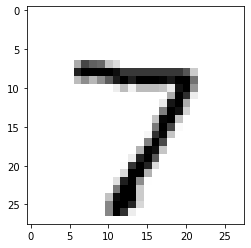

In [32]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [33]:
digit = test_images[0:1]
model.predict(digit)

array([[7.6791587e-11, 1.7244630e-13, 2.1308470e-08, 1.0395260e-05,
        4.2433094e-15, 1.1839021e-08, 1.0051013e-17, 9.9998903e-01,
        3.8484363e-10, 5.9273492e-07]], dtype=float32)